# Test du git

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Etude des données du jeu d'entrainement

Ouverture du fichier 'ecg_tracings.hdf5' contenant un seul jeu de données nommé tracings. Cet ensemble de données est un tenseur (827, 4096, 12). La première dimension correspond aux 827 examens différents de différents patients ; la deuxième dimension correspond aux 4096 échantillons de signal ; la troisième dimension aux 12 dérivations différentes des examens ECG dans l'ordre suivant : {DI, DII, DIII, AVL, AVF, AVR, V1, V2, V3, V4, V5, V6}.

In [2]:
import h5py
path = "data/"
with h5py.File(path+'ecg_tracings.hdf5', "r") as f:
    x = np.array(f['tracings'])
print(x.shape)

(827, 4096, 12)


Ouverture du fichier 'attributes.csv' qui contient les attributs de base du patient : sexe (M ou F) et âge. Il contient 827 lignes (plus l'en-tête). Le i-ème tracé dans ecg_tracings.hdf5 correspond à la i-ème ligne.

In [3]:
path = "data/"
attribute = pd.read_csv(path+'attributes.csv')
print(attribute.shape)
display(attribute.head())

(827, 2)


,age,sex
0,34,M
1,70,F
2,52,F
3,41,F
4,32,F


Ouverture du fichier 'cardiologist1.csv' qui contient des annotations du premier cardiologue.

In [4]:
path = "data/annotations/"
cardio1 = pd.read_csv(path+'cardiologist1.csv')
print(cardio1.shape)
display(cardio1.head())

(827, 6)


,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Ouverture du fichier 'cardiologist2.csv' qui contient des annotations du deuxième cardiologue.

In [5]:
path = "data/annotations/"
cardio2 = pd.read_csv(path+'cardiologist2.csv')
print(cardio2.shape)
display(cardio2.head())

(827, 6)


,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Ouverture du fichier 'dnn.csv' qui contient les prédiction à partir du réseau de neurones profonds décrit dans "Diagnostic automatique de l'ECG de courte durée à 12 dérivations à l'aide d'un réseau de neurones profonds". Le seuil est fixé de manière à maximiser le score F1.

In [6]:
path = "data/annotations/"
dnn = pd.read_csv(path+'dnn.csv')
print(dnn.shape)
display(dnn.head())

(827, 7)


,Unnamed: 0,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,0,0,0,0,0,0


Ouverture du fichier 'cardiology_residents.csv' qui contient les annotations de deux résidents en cardiologie de 4e année (chacun annoté la moitié de l'ensemble de données).

In [7]:
path = "data/annotations/"
cardio_resident = pd.read_csv(path+'cardiology_residents.csv')
print(cardio_resident.shape)
display(cardio_resident.head())

(827, 6)


,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Ouverture du fichier 'emergency_residents.csv' qui contient les annotations de deux résidents d'urgence de 3e année (chacun annoté la moitié de l'ensemble de données).

In [8]:
path = "data/annotations/"
emerg_resident = pd.read_csv(path+'emergency_residents.csv')
print(emerg_resident.shape)
display(emerg_resident.head())

(827, 6)


,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Ouverture du fichier 'medical_students.csv' qui contient les annotations de deux étudiants en médecine de 5e année (chacun annoté la moitié de l'ensemble de données).

In [9]:
path = "data/annotations/"
med_student = pd.read_csv(path+'medical_students.csv')
print(med_student.shape)
display(med_student.head())

(827, 6)


,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Ouverture du fichier 'gold_standard.csv' contenant les annotation d'étalon-or pour cet ensemble de données de test. Lorsque le cardiologue 1 et le cardiologue 2 étaient d'accord, le diagnostic commun était considéré comme le gold standard. En cas de désaccord, un troisième spécialiste principal, au courant des annotations des deux autres, décidait du diagnostic.

In [10]:
lead_order = ["DI", "DII", "DIII", "AVL", "AVF", "AVR", "V1", "V2", "V3", "V4", "V5", "V6"]
path = "data/annotations/"
df_goldStandard = pd.read_csv(path+'gold_standard.csv')
df_goldStandard['nb_abnormality'] =  df_goldStandard.sum(axis=1)
print(df_goldStandard.shape)
display(df_goldStandard.head(20).T)

(827, 7)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1dAVb,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
RBBB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LBBB,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
SB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ST,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nb_abnormality,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,0


Visualisation des cardiogramme de 5 patient qui n'ont pas d'annomalies.

1dAVb 0
RBBB 1
LBBB 2
SB 3
AF 4
ST 5


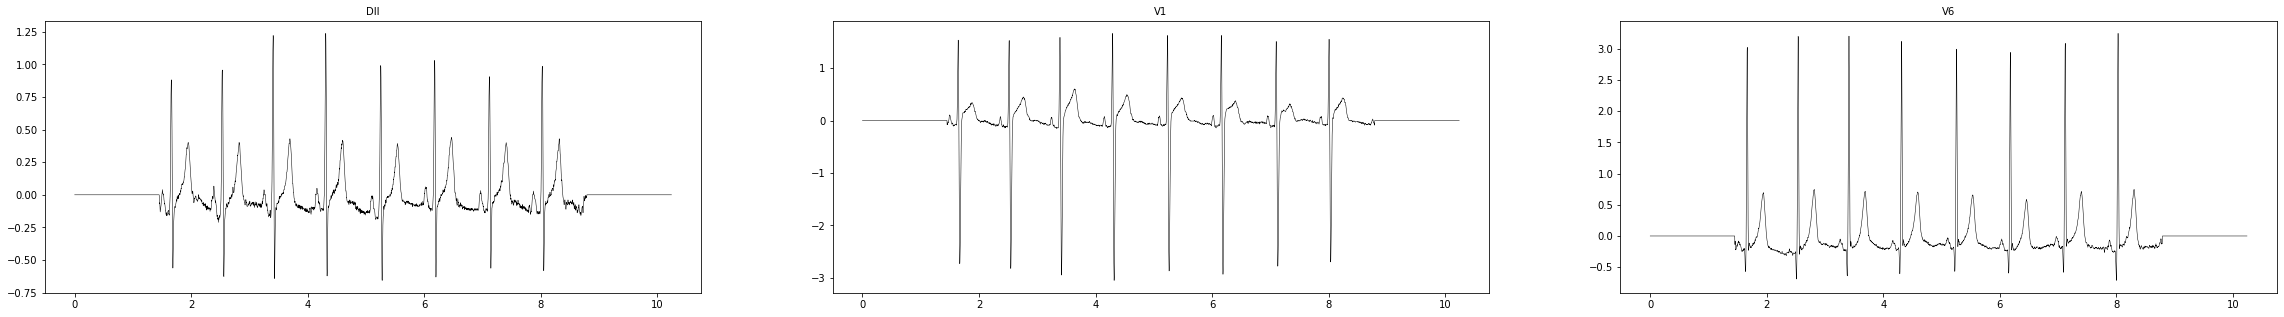

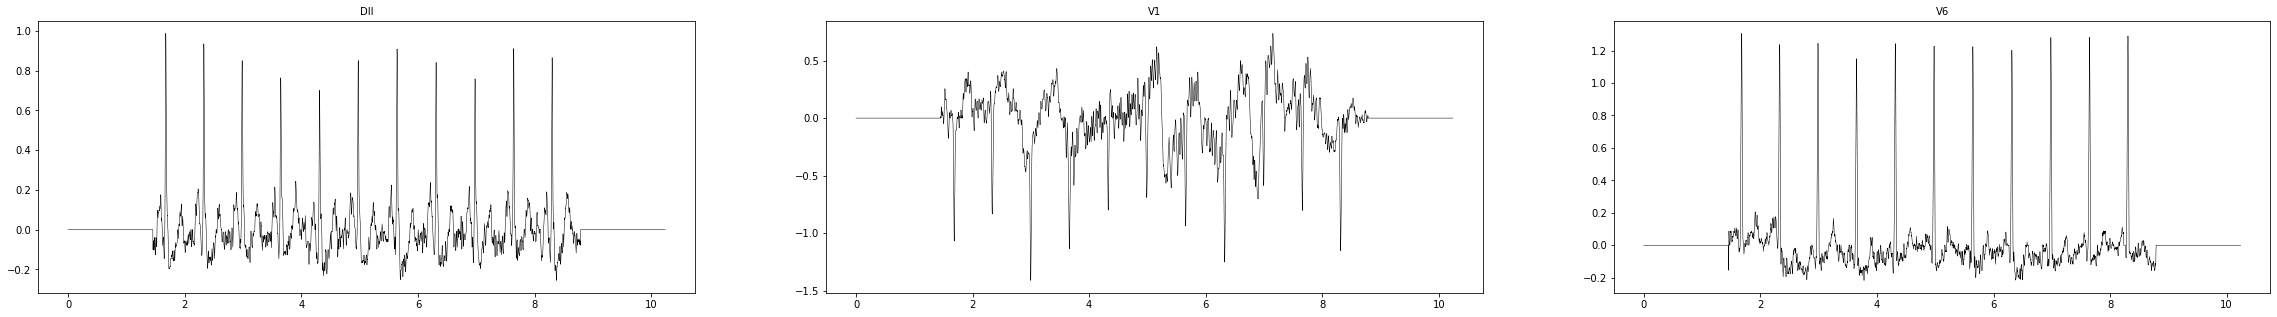

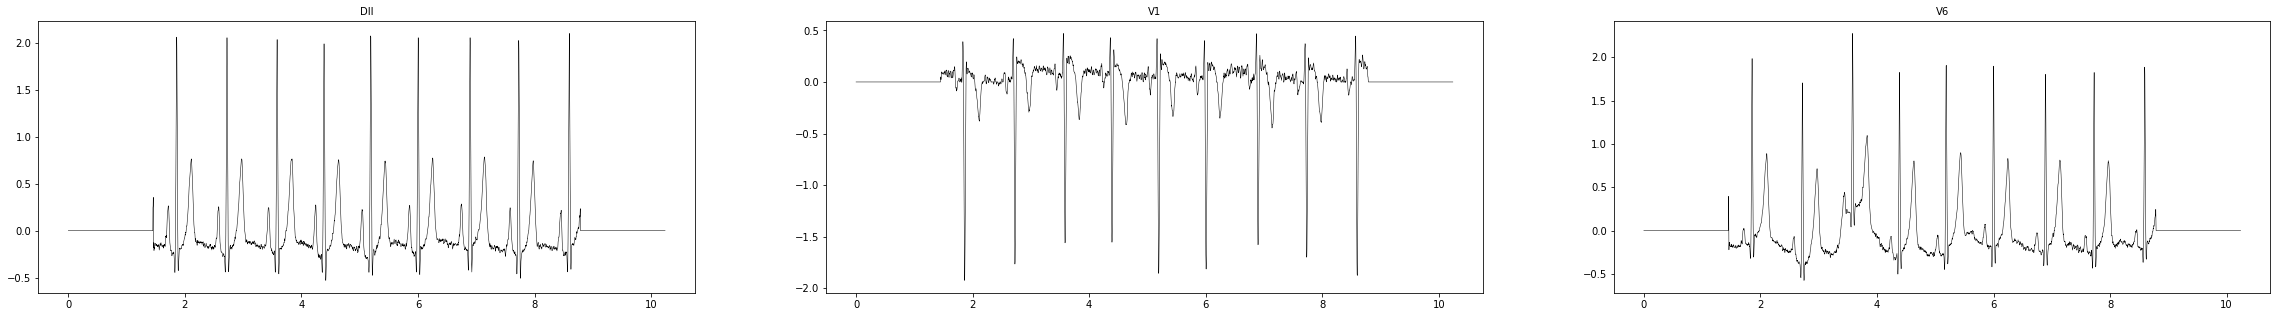

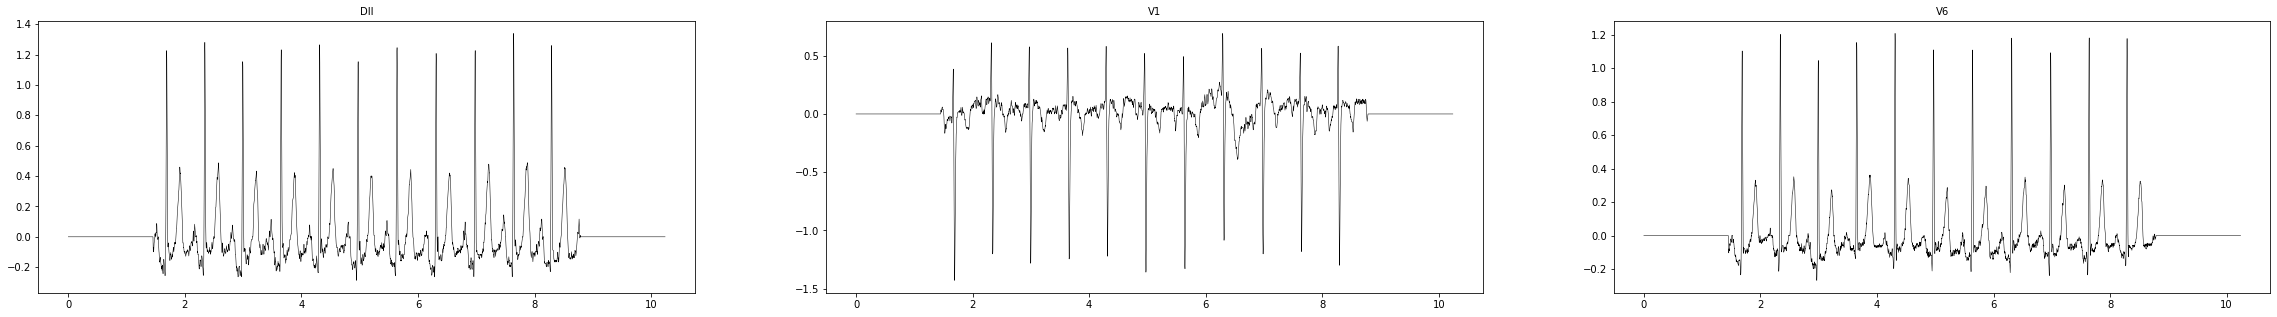

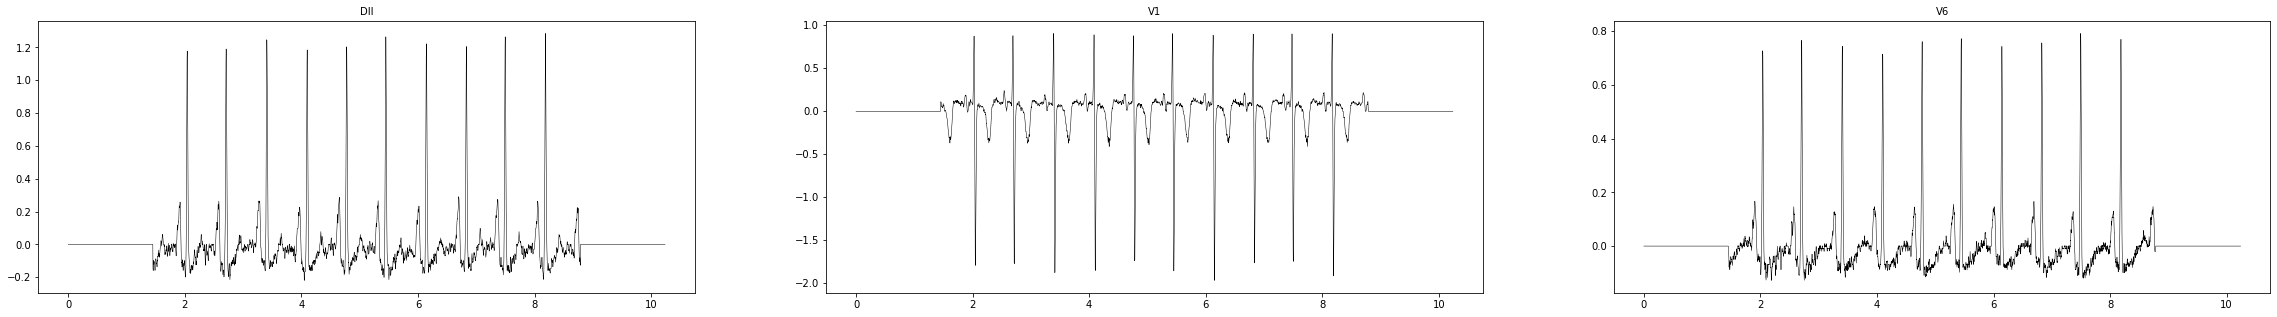

In [11]:
for idx_abn, abnormality in enumerate(df_goldStandard.columns[:-1]):
    print(abnormality,idx_abn)
    
# visualisation a refaire en mieux
for idx_safe in df_goldStandard[df_goldStandard.nb_abnormality==0].index[:5]: #indice des gens qui ont un cardio safe
    fig, axs = plt.subplots(1, 3,figsize=(40,5))
    for i,pos in enumerate([1,6,11]):
        ax = axs[i]
        ax.set_title(lead_order[pos],fontsize=10)
        ax.plot(np.linspace(0,10.24,4096),x[idx_safe,:,pos],'k', linewidth=.5)
    plt.show()

Visualisation des cardiogrammes des patient qui ont une anomalie.

1dAVb  : 


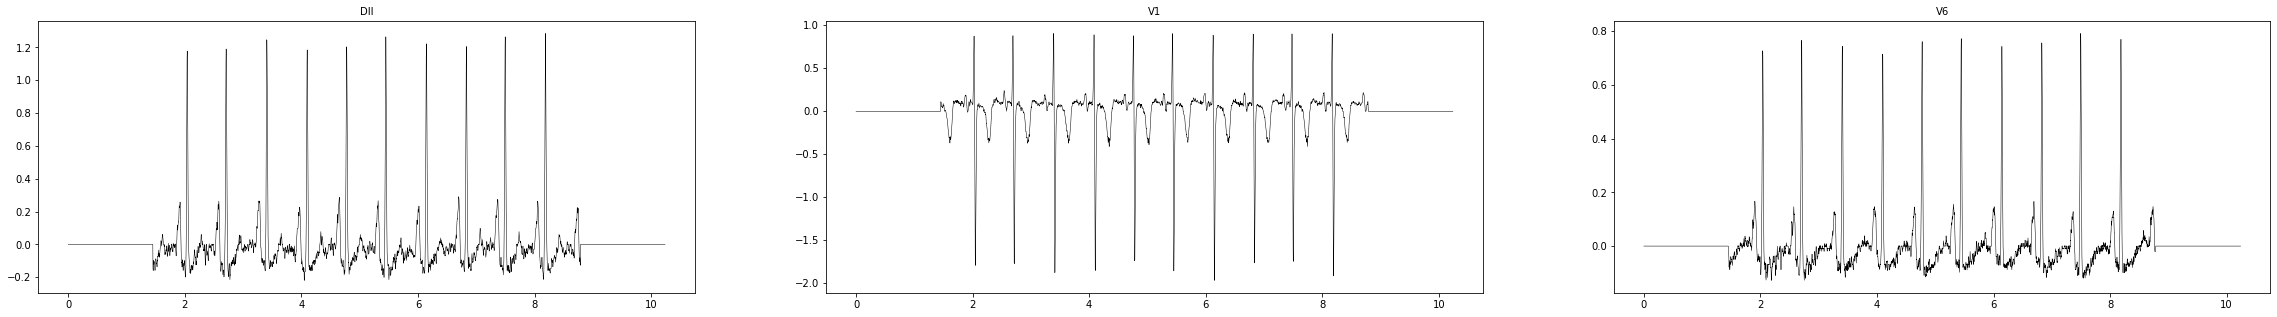

RBBB  : 


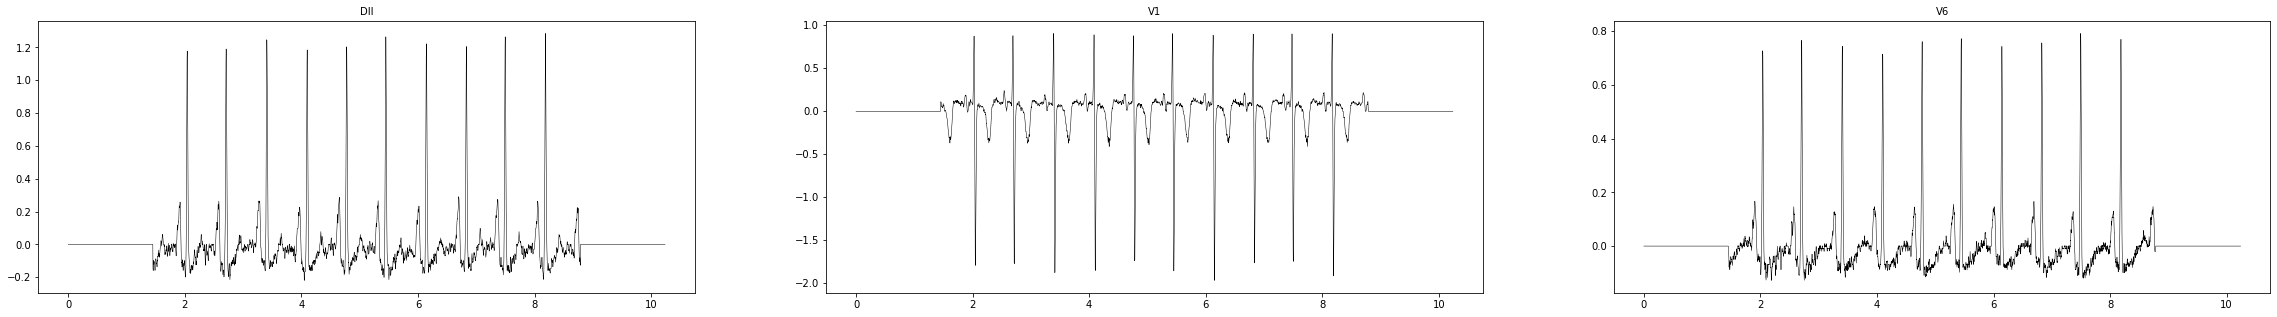

LBBB  : 


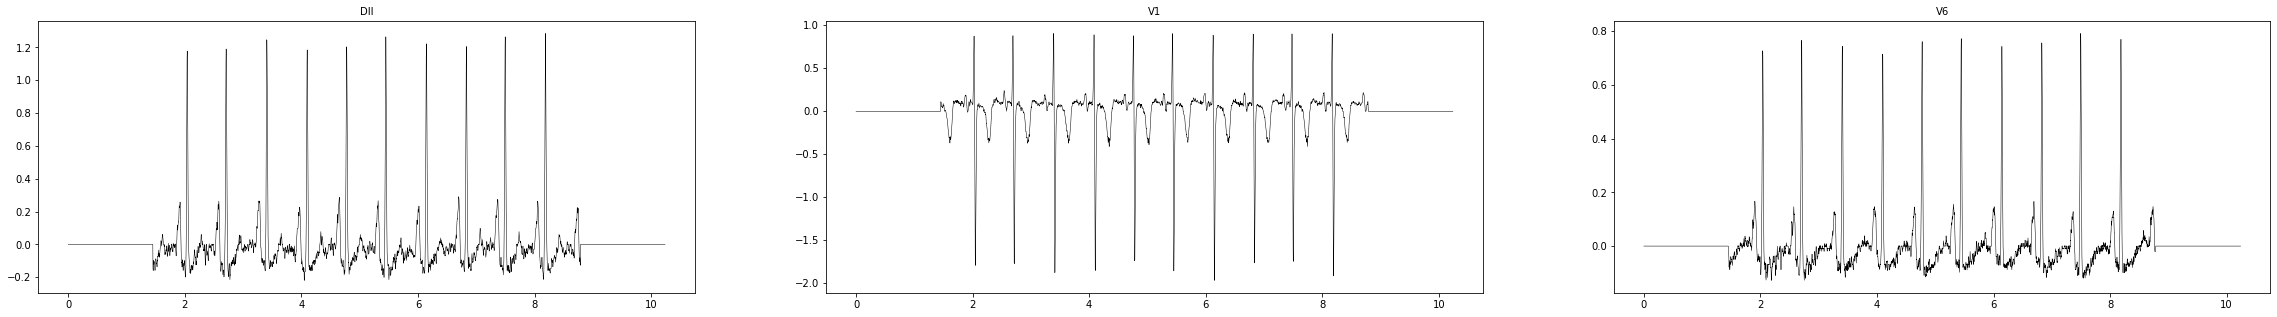

SB  : 


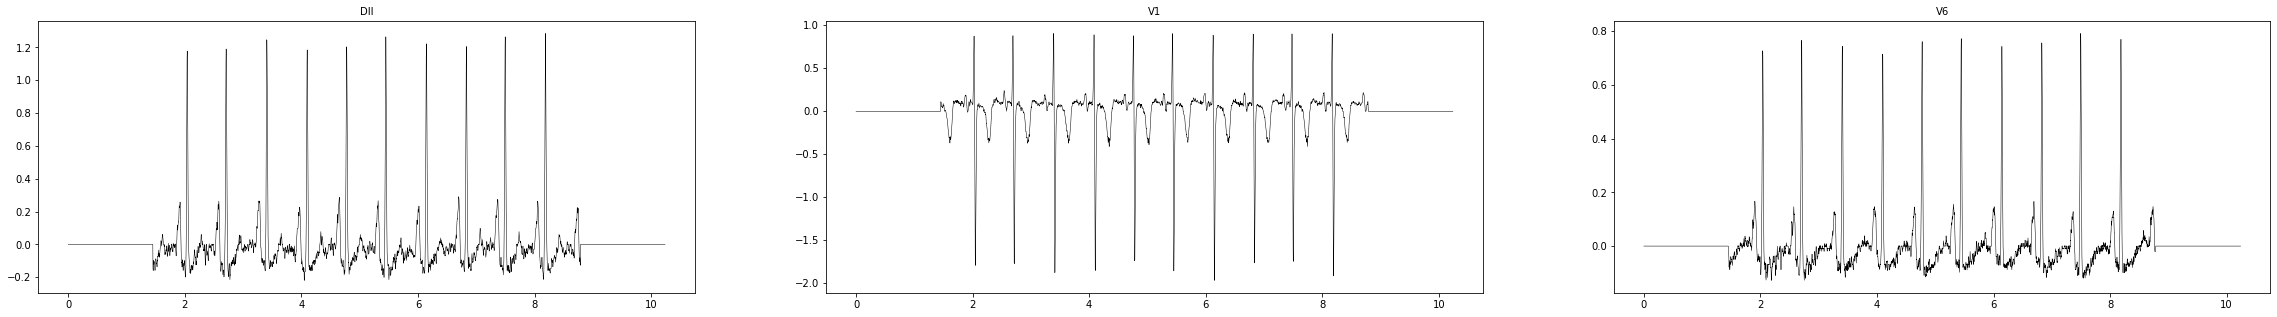

AF  : 


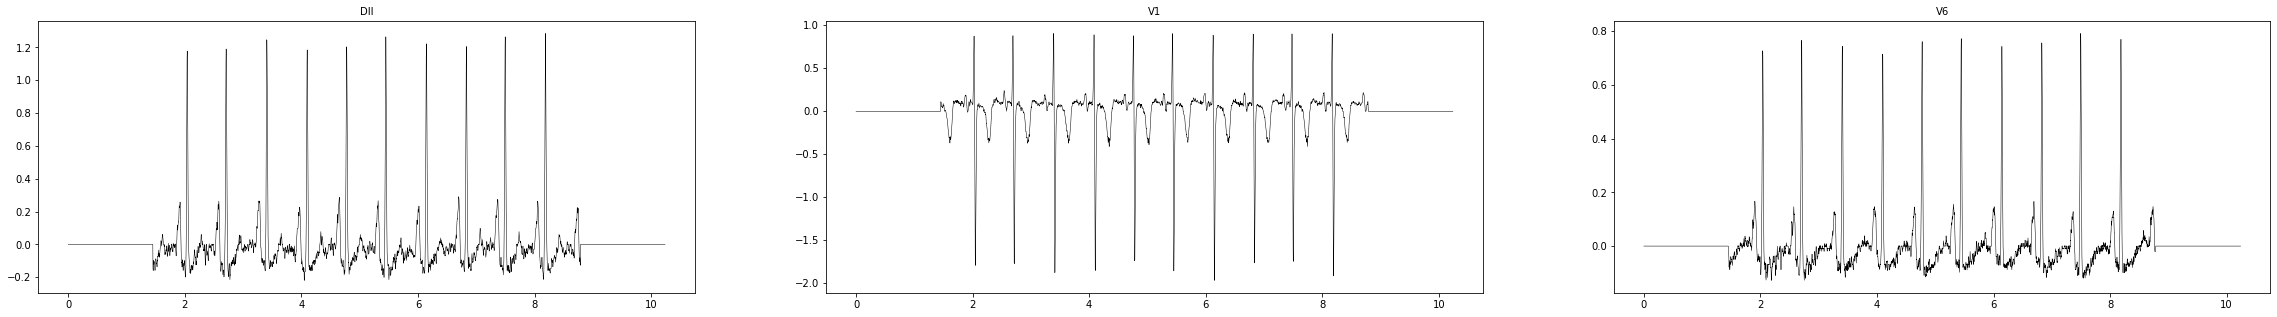

ST  : 


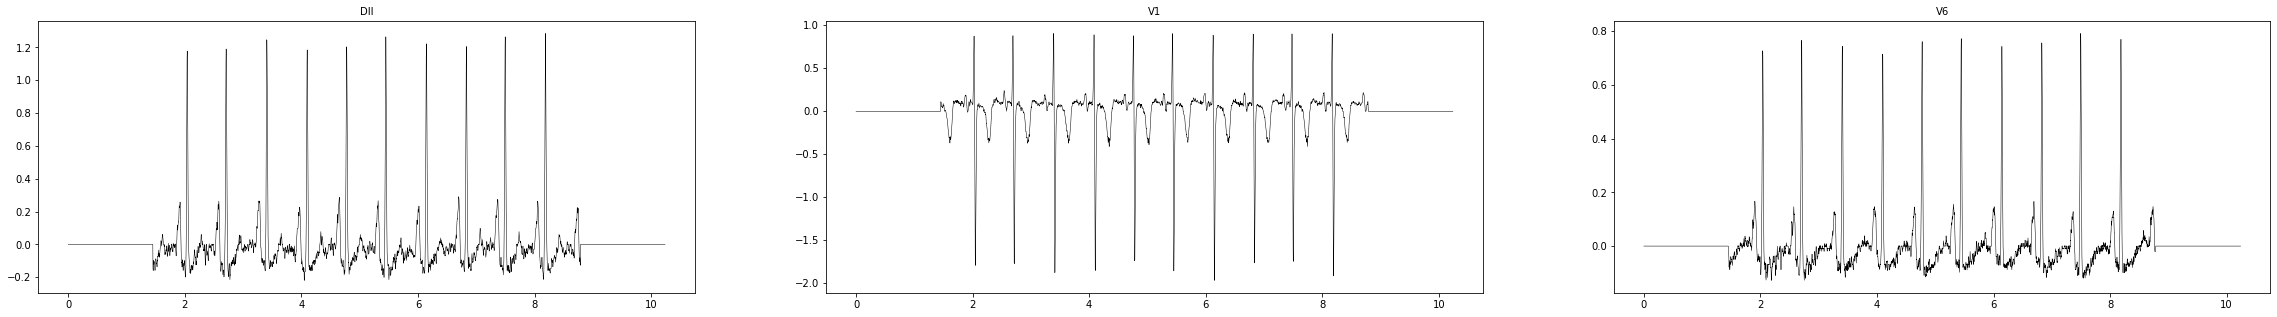

In [12]:
## A REVOIR : pour que nb_abnormality == 1

list_abnormality = ["1dAVb", "RBBB", "LBBB", "SB", "AF", "ST"]
for abnormality in list_abnormality :
    print(abnormality, ' : ')
    for idx_anomal in df_goldStandard[df_goldStandard[abnormality]==1].index[:1] : #trouve l'indice ou le patient a l'anomalie
        fig, axs = plt.subplots(1, 3,figsize=(40,5))
        for i,pos in enumerate([1,6,11]):
            ax = axs[i]
            ax.set_title(lead_order[pos],fontsize=10)
            ax.plot(np.linspace(0,10.24,4096),x[idx_safe,:,pos],'k', linewidth=.5)
        plt.show()

Pourcentage de patient sans anomalie et atteind d'une certaine anomalie.

In [13]:
#Patient sans anomalie
nb_patient = (df_goldStandard.nb_abnormality==0).sum()
print(nb_patient*100/827,'% de patient sans anomalie')

#Patient avec anomalie
list_abnormality = ["1dAVb", "RBBB", "LBBB", "SB", "AF", "ST"]
for abnormality in list_abnormality :
    nb_patient = df_goldStandard[abnormality].sum()
    print(nb_patient*100/827,'% de patient atteind de ', abnormality)

82.34582829504232 % de patient sans anomalie
3.3857315598548974 % de patient atteind de  1dAVb
4.111245465538089 % de patient atteind de  RBBB
3.6275695284159615 % de patient atteind de  LBBB
1.9347037484885128 % de patient atteind de  SB
1.5719467956469166 % de patient atteind de  AF
4.474002418379686 % de patient atteind de  ST


### Utilisation du réseau de neurones pour prévoir les anomalies (pathologies cardiaques)

Exécution du programme 'model.py' qui permet l'implémentation de l'architecture de réseau neuronal dans Keras. Le modèle utilisé dans l'article est un neurone résiduel. Le modèle reçoit un tenseur d'entrée de dimension (N, 4096, 12) et renvoie un tenseur de sortie de dimension (N, 6), pour lequel N est la taille du lot.

In [14]:
%run -i 'model.py'

2021-11-02 06:12:37.565132: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-02 06:12:37.565201: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-02 06:12:39.041232: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-02 06:12:39.041312: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-02 06:12:39.041341: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2021-11-02 06:12:39.041548: I tensorflow/core/platform/cpu_feature_gua

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
signal (InputLayer)             [(None, 4096, 12)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4096, 64)     12288       signal[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4096, 64)     256         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 4096, 64)     0           batch_normalization[0][0]        
______________________________________________________________________________________________

Exécution du programme 'train.py' pour entraîné le modèle. 

In [18]:
%run -i 'train.py'

usage: train.py [-h] [--val_split VAL_SPLIT] [--dataset_name DATASET_NAME]
                path_to_hdf5 path_to_csv
train.py: error: the following arguments are required: path_to_hdf5, path_to_csv


SystemExit: 2

In [ ]:
print(openpyxl.__version__)

Utiliser deuxieme partie du code du prof qui trace les graphe pour tracer prediction (je crois)

### Evaluation de la performance de notre classifieur

Exécution du programme 'generate_figures_and_tables.py' qui génère des figures et des tableaux à partir de l'article "Automatic Diagnosis o the Short-Duration12-Lead ECG using a Deep Neural Network". C'est-à-dire ......................................................................................................................................

Faire du blabla !!!!!

In [ ]:
%run -i 'generate_figures_and_tables.py'